In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller



#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark")  

In [7]:
# get airline passenger data 

# Uncomment below to get the data

# !wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

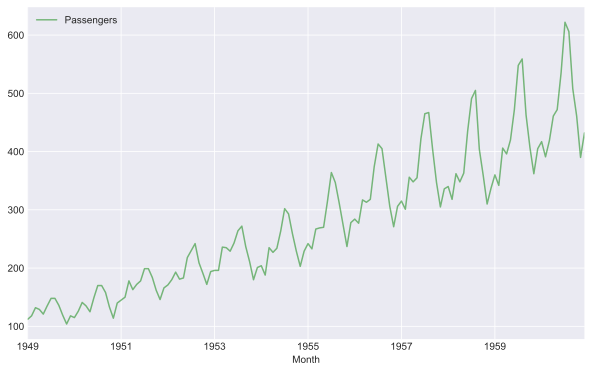

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col=0, parse_dates=True)

fig, axes = plt.subplots(figsize = (10,6))

df.plot(ax = axes, color = 'green', alpha = 0.5)

axes.grid()

Passenger Data is obviously non-stationary!

In [3]:
adfuller(df['Passengers'])

(0.8153688792060416,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Check the [link](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) for the documentation of adfuller. This tells us that first value is the test statistic and the second is the p-value we need to decide if the TS is stationary or not!

In [4]:
# Helper function to decide if the series is stationary or not!

def adf(x): # Note that the null hypothesis is that the TS is non-stationary

    test, p_val, *_ = adfuller(x)

    print(f"ADF test statistic: {test:.4f}")
    print(f"ADF p-value: {p_val:.4f}")

    if p_val < 0.05:
        print('Time-series is stationary!')
    else:
        print('Time-series is not stationary!')

In [5]:
adf(df)

ADF test statistic: 0.8154
ADF p-value: 0.9919
Time-series is not stationary!


In [6]:
adf(np.random.randn(100))

ADF test statistic: -9.6612
ADF p-value: 0.0000
Time-series is stationary!


In [7]:
# Let's check the log transformed passanger count, something we used earlier whic

df['LogPassengers'] = np.log(df['Passengers'])

adf(df['LogPassengers'])

ADF test statistic: -1.7170
ADF p-value: 0.4224
Time-series is not stationary!


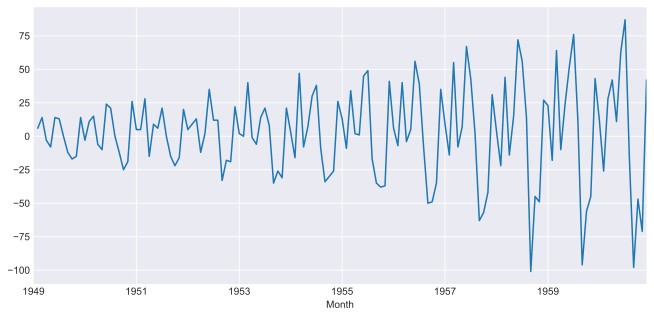

In [8]:
# Take differencing of the passenger data and plot 

df['1stDiff'] = df['Passengers'].diff()

fig, axes = plt.subplots(figsize = (11,5))

df['1stDiff'].plot(ax = axes)

axes.grid()

In [9]:
# check if the 1st differenced series is stationary 

adf(df['1stDiff'].dropna())

ADF test statistic: -2.8293
ADF p-value: 0.0542
Time-series is not stationary!


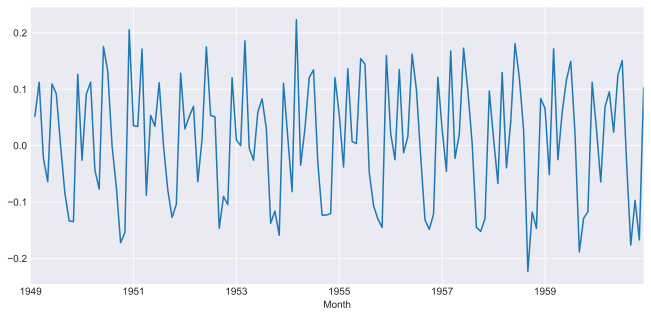

In [10]:
df['Log1stDiff'] = df['LogPassengers'].diff()

fig, axes = plt.subplots(figsize = (11,5))

df['Log1stDiff'].plot(ax = axes)

axes.grid()

Looks more stationary! lets check 

In [11]:
# p -value is actually larger than the non-logged differenced time series

adf(df['Log1stDiff'].dropna())

ADF test statistic: -2.7171
ADF p-value: 0.0711
Time-series is not stationary!


In [36]:
# get the stock price data 

!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2024-04-09 15:05:10--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: 'sp500sub.csv'

sp500sub.csv        100%[===================>]  24.29M  9.86MB/s    in 2.5s    

2024-04-09 15:05:14 (9.86 MB/s) - 'sp500sub.csv' saved [25473876/25473876]



In [12]:
stocks = pd.read_csv('sp500sub.csv', index_col=0, parse_dates=True)

In [13]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [15]:
# get google close prices 

goog = stocks[stocks.Name == 'GOOG'][['Close']]

In [16]:
# Log price and return

goog['LogClose'] = np.log(goog['Close'])
goog['LogReturn'] = goog['LogClose'].diff()

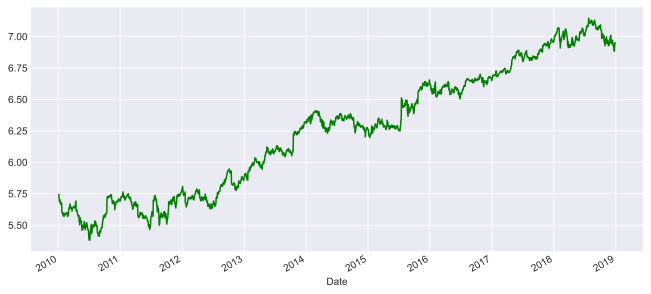

In [18]:
fig, axes = plt.subplots(figsize = (11,5))

goog['LogClose'].plot(ax = axes, color = 'green')

axes.grid()

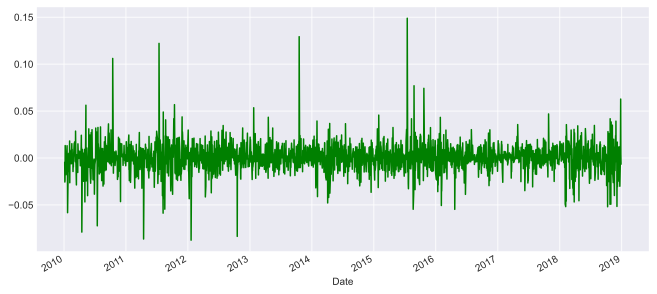

In [19]:
fig, axes = plt.subplots(figsize = (11,5))

goog['LogReturn'].plot(ax = axes, color = 'green')

axes.grid()

In [20]:
# check if the Log prices are stationary

adf(goog['LogClose'])

ADF test statistic: -0.4182
ADF p-value: 0.9070
Time-series is not stationary!


In [21]:
# check if the Log prices are stationary

adf(goog['LogReturn'].dropna())

ADF test statistic: -46.6675
ADF p-value: 0.0000
Time-series is stationary!
